# **AICP ML Internship 3.0 Task Week 3**

Search Queries Anomaly Detection is a technique to identify unusual or unexpected patterns in search query data. Below is the process we can follow for the task of Search Queries Anomaly Detection:

1. Gather historical search query data from the source, such as a search engine or a website’s search functionality.

2. Conduct an initial analysis to understand the distribution of search queries, their frequency, and any noticeable patterns or trends.

3. Create relevant features or attributes from the search query data that can aid in anomaly detection.

4. Choose an appropriate anomaly detection algorithm. Common methods include statistical approaches like Z-score analysis and machine learning algorithms like Isolation Forests or One-Class SVM.

5. Train the selected model on the prepared data.
6. Apply the trained model to the search query data to identify anomalies or outliers.

Q.1: **Import data and check null values, check column info and the descriptive statistics of the data.**

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/Queries.csv')

# Q.1: Check for null values, column info, and descriptive statistics
# Check for null values
null_values = df.isnull().sum()

# Check column info
column_info = df.info()

# Descriptive statistics
descriptive_statistics = df.describe()

null_values, column_info, descriptive_statistics


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Top queries  1000 non-null   object 
 1   Clicks       1000 non-null   int64  
 2   Impressions  1000 non-null   int64  
 3   CTR          1000 non-null   object 
 4   Position     1000 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 39.2+ KB


(Top queries    0
 Clicks         0
 Impressions    0
 CTR            0
 Position       0
 dtype: int64,
 None,
           Clicks   Impressions     Position
 count  1000.0000   1000.000000  1000.000000
 mean    172.2750   1939.466000     3.985930
 std     281.0221   4856.702605     2.841842
 min      48.0000     62.000000     1.000000
 25%      64.0000    311.000000     2.010000
 50%      94.0000    590.500000     3.120000
 75%     169.0000   1582.750000     5.342500
 max    5223.0000  73380.000000    28.520000)

Q.2: **Now convert the CTR column from a percentage string to a float.**

In [3]:
# Q.2: Convert the CTR column from a percentage string to a float
df['CTR'] = df['CTR'].str.rstrip('%').astype(float) / 100

# Check the first few rows to confirm the conversion
df.head()


,Top queries,Clicks,Impressions,CTR,Position
0,number guessing game python,5223,14578,0.3583,1.61
1,thecleverprogrammer,2809,3456,0.8128,1.02
2,python projects with source code,2077,73380,0.0283,5.94
3,classification report in machine learning,2012,4959,0.4057,1.28
4,the clever programmer,1931,2528,0.7638,1.09


Q.3: **Now analyze common words in each search query in the following manner**:
* Create a function to clean and split the queries into words.
* Split each query into words and count the frequency of each word.
* Plot the word frequencies.



In [4]:
from collections import Counter
import re
import plotly.express as px

# Function to clean and split queries into words
def clean_and_split_queries(queries):
    words = []
    for query in queries:
        # Remove punctuation and split into words
        query_words = re.findall(r'\w+', query.lower())
        words.extend(query_words)
    return words

# Split each query into words and count the frequency of each word
words = clean_and_split_queries(df['Top queries'])
word_counts = Counter(words)

# Convert the word counts to a DataFrame for plotting
word_counts_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)

# Plot the word frequencies
fig = px.bar(word_counts_df.head(20), x='Word', y='Frequency', title='Top 20 Most Frequent Words in Search Queries')
fig.show()


Q.4: **Now have a look at the top queries by clicks and impressions.**

In [6]:
# Q.4: Analyze the top queries by clicks and impressions

# Sorting the data based on Clicks and Impressions
top_clicks = df.sort_values(by='Clicks', ascending=False).head(10)
top_impressions = df.sort_values(by='Impressions', ascending=False).head(10)

# Plotting top queries by Clicks
fig_clicks = px.bar(top_clicks, x='Top queries', y='Clicks', title='Top 10 Queries by Clicks')
fig_clicks.show()

# Plotting top queries by Impressions
fig_impressions = px.bar(top_impressions, x='Top queries', y='Impressions', title='Top 10 Queries by Impressions')
fig_impressions.show()


Q.5: **Now analyze the queries with the highest and lowest CTRs.**

In [7]:
# Q.5: Analyze the queries with the highest and lowest CTRs

# Sorting the data to find the queries with the highest and lowest CTRs
highest_ctr = df.sort_values(by='CTR', ascending=False).head(10)
lowest_ctr = df.sort_values(by='CTR').head(10)

# Plotting the queries with the highest CTRs
fig_highest_ctr = px.bar(highest_ctr, x='Top queries', y='CTR', title='Top 10 Queries by Highest CTR')
fig_highest_ctr.show()

# Plotting the queries with the lowest CTRs
fig_lowest_ctr = px.bar(lowest_ctr, x='Top queries', y='CTR', title='Top 10 Queries by Lowest CTR')
fig_lowest_ctr.show()


Q.6: **Now check the correlation between different metrics. Also explain your observation from the correlation matrix**

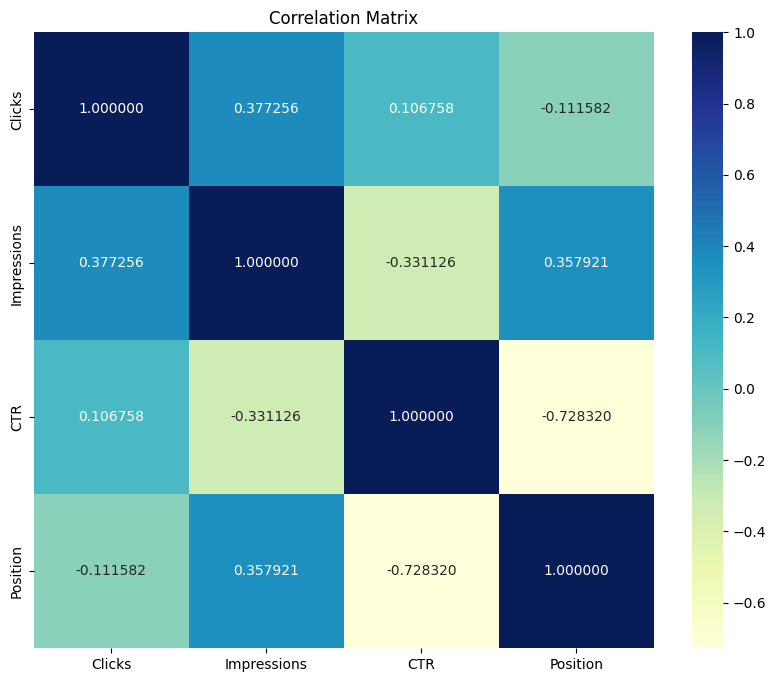

In [18]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/Queries.csv')

# Convert the CTR column from a percentage string to a float for correlation analysis
df['CTR'] = df['CTR'].str.replace('%', '').astype('float') / 100.0

# Calculate the correlation matrix for numerical columns only
correlation_matrix = df[['Clicks', 'Impressions', 'CTR', 'Position']].corr()

# Use seaborn to create a heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".6f", cmap="YlGnBu")
plt.title("Correlation Matrix")
plt.show()



Q.7: **Now, detect anomalies in search queries. You can use various techniques for anomaly detection. A simple and effective method is the Isolation Forest algorithm, which works well with different data distributions and is efficient with large datasets.**

In [19]:
from sklearn.ensemble import IsolationForest

# Assuming the necessary columns have already been converted to appropriate data types

# Initializing the Isolation Forest model
iso_forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)

# Fitting the model on the numerical data
iso_forest.fit(df[['Clicks', 'Impressions', 'CTR', 'Position']])

# Predicting anomalies (the lower, the more abnormal)
anomalies = iso_forest.predict(df[['Clicks', 'Impressions', 'CTR', 'Position']])

# Add a new column for anomaly detection
df['Anomaly'] = anomalies

# Filter the dataframe for anomalies (isolation forest marks anomalies as -1)
anomaly_df = df[df['Anomaly'] == -1]

# Show the detected anomalies
anomaly_df[['Top queries', 'Clicks', 'Impressions', 'CTR', 'Position']]



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



,Top queries,Clicks,Impressions,CTR,Position
0,number guessing game python,5223,14578,0.3583,1.61
1,thecleverprogrammer,2809,3456,0.8128,1.02
2,python projects with source code,2077,73380,0.0283,5.94
4,the clever programmer,1931,2528,0.7638,1.09
15,rock paper scissors python,1111,35824,0.0310,7.19
21,classification report,933,39896,0.0234,7.53
34,machine learning roadmap,708,42715,0.0166,8.97
82,r2 score,367,56322,0.0065,9.33
232,standardscaler,177,39267,0.0045,10.23
929,python turtle,52,18228,0.0029,18.75
